In [1]:
import qiskit
qiskit.__version__

'1.3.1'

In [2]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator
import numpy as np
import matplotlib.pyplot as plt

# Two-spin Heisenberg model

Example 3.1: Two-qubit Heisenberg model.} Consider a two-qubit isotropic Heisenberg model described by the Hamiltonian  
\begin{align}
    \hat{H} = \prod_j \sigma^j\otimes \sigma^j = X \otimes X + Y \otimes Y + Z \otimes Z,
\end{align}
and an initial state given by  
\begin{align}
    |\psi(0)\rangle = \frac{1}{\sqrt{2}} |0\rangle \big(|0\rangle + |1\rangle\big).
\end{align}
The observables of interest are the magnetizations of the two spins, defined as  
\begin{align}
    s_z^{(i)} \equiv \frac{1}{2} Z^{(i)},
\end{align}
where \( Z^{(i)} \) represents the \( Z \)-gate acting on the \( i^{\text{th}} \) qubit.

In [8]:
def U2(t):
    """
    """
    ut = QuantumCircuit(2, name = '$U_2$')

    # A^\dagger = H \otimes H S^\dagger = H Z S
    ut.h(1)
    ut.s(0)
    ut.z(0)
    ut.h(0)

    ut.cx(1, 0)
    ut.rz(2*t, 0)
    ut.cx(1, 0)

    # A = H \otimes S H
    ut.h(1)
    ut.h(0)
    ut.s(0)

    ut.draw('mpl')
    return ut.to_instruction()

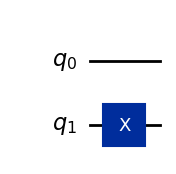

In [13]:
# 1. State preparation

psi0 = QuantumCircuit(2)
psi0.x(1)


psi0.draw('mpl')

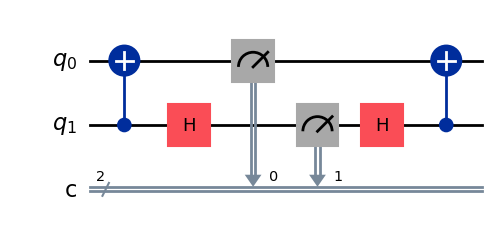

In [12]:
# 3. Measurement
qbits, cbits = QuantumRegister(2, 'q'), ClassicalRegister(2, 'c')

mea = QuantumCircuit(qbits, cbits)

# B^\dagger
mea.cx(1, 0)
mea.h(1)

mea.measure(qbits, cbits)

# B
mea.h(1)
mea.cx(1, 0)

mea.draw('mpl')

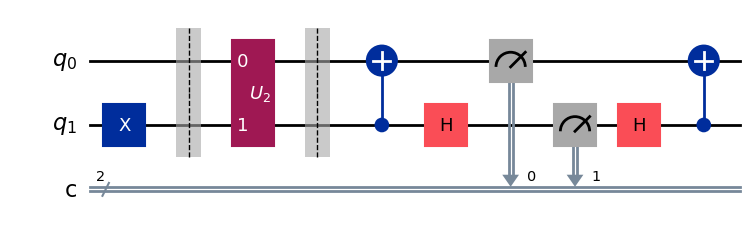

In [17]:
psi = psi0.copy()
psi.barrier()
psi.append(U2(np.pi/5), psi0.qubits)
psi.barrier()
psi &= mea
psi.draw('mpl')

# Three-spin Heisenberg model

https://arxiv.org/pdf/1907.03505

## Direct exponentiation

In [5]:
def H3(B):
    X = np.array([[0, 1.0], [1.0, 0]])
    Y = np.array([[0, -1.0j], [1.0j, 0]])
    Z = np.array([[1.0, 0.0], [0.0, -1.0]])
    I = np.identity(2)
    H2 = np.kron(X, X) + np.kron(Y, Y) + np.kron(Z, Z)
    H0 = np.kron(I, H2) + np.kron(H2, I)
    Hg = np.kron(np.kron(Z, I), I) + np.kron(np.kron(I, Z), I) + np.kron(np.kron(I, I), Z)

    return H0 + 0.5*B*Hg

In [11]:
def psi0(q2, q1, q0):
    """
    qi in binary
    """
    comp_basis = np.array([[1.0,0],[0, 1.0]])
    return np.kron(comp_basis[:, q2], np.kron(comp_basis[:, q1], comp_basis[:, q0]))

In [7]:
from scipy.linalg import expm
def U3(t, B):
    return expm(-1.0j*t*H3(B))

In [31]:
ts = np.linspace(0, np.pi, 100)

In [32]:
ut = [U3(t, 20) for t in ts]

In [14]:
p0 = psi0(1, 0, 0)

In [33]:
pts = [u@p0 for u in ut]

In [34]:
p0pts = np.array([p0@pt for pt in pts])

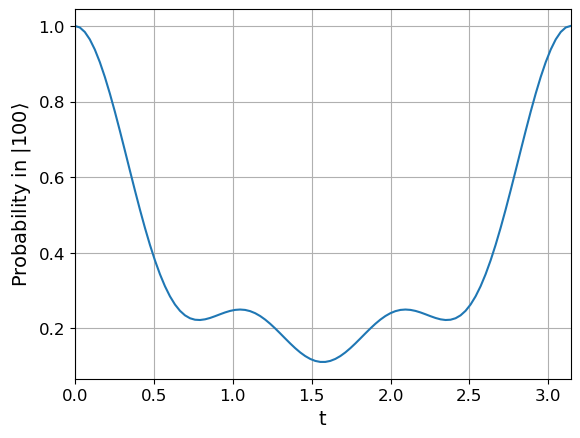

In [49]:
plt.plot(ts, np.abs(p0pts)**2)
plt.xlim([0, np.pi])
plt.grid()
plt.xlabel("t", fontsize=14)
plt.ylabel(r"Probability in $|100\rangle$", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=12)